In [4]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [7]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.rand(200,1)

#y=0.8x^2+0.9x+2

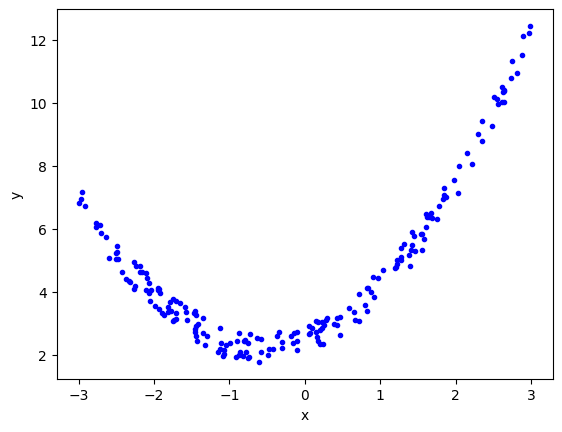

In [8]:
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(x_test)

In [13]:
r2_score(y_test,y_pred)

0.31618541755797513

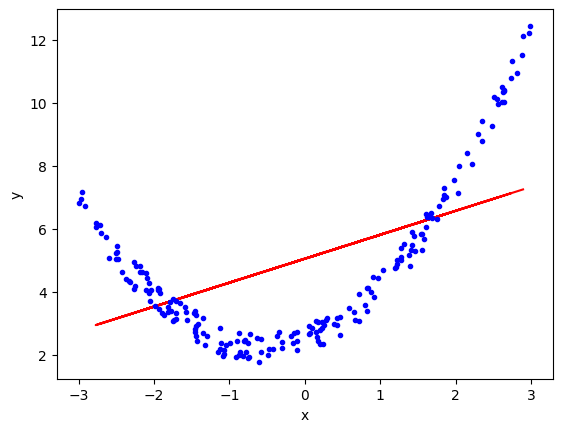

In [15]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [18]:
#applying polynomial linear regression
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

#this transformation always apply on x


In [19]:
print(x_train_poly[0])
print(x_train[0])

[1.         0.38383121 0.14732639]
[0.38383121]


In [20]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(x_test_poly)

In [22]:
r2_score(y_test,y_pred)

0.9867936422111468

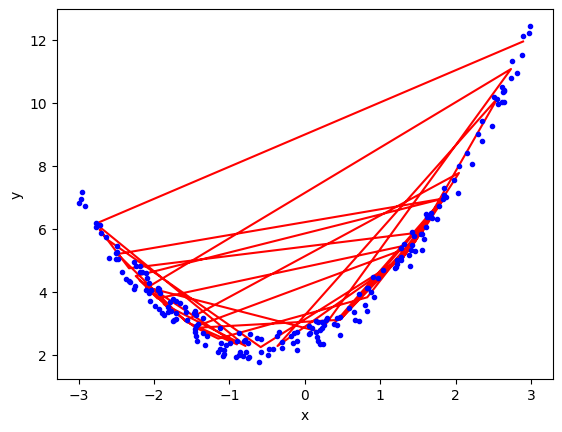

In [25]:
plt.plot(x_train,lr.predict(x_train_poly),color='r')
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [26]:
x=7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8
z=x**2+y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.rand(100,1)

In [27]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [29]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)
x_input=np.linspace(x.min(),x.max(),10)
y_input=np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(x_input,y_input)
final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final=lr.predict(final).reshape(10,10)

In [33]:
import plotly.graph_objects as go
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))

fig.show()

In [35]:
x_multi=np.array([x,y]).reshape(100,2)
x_multi.shape

(100, 2)

In [53]:
poly=PolynomialFeatures(degree=6)
x_multi_poly=poly.fit_transform(x_multi)

In [54]:
print("output",poly.n_output_features_)
#print("input",poly.n_Input_features_)
print("Output",x_multi_poly.shape)
print("powers\n",poly.powers_)


output 28
Output (100, 28)
powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


In [55]:

lr=LinearRegression()
lr.fit(x_multi_poly,z)

LinearRegression()

In [56]:
x_test_multi=poly.transform(final)

In [57]:
z_final=lr.predict(x_test_multi).reshape(10,10)

In [58]:
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))

fig.show()